In [9]:
# import libs
import numpy as np
import tensorflow as tf

In [10]:
# load some data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 1. Tensorflow 基本概念
- 使用图(graph)来表示计算任务
- 在被称为会话(Session)的上下文(Context)中执行图
- 使用tensor表示数据
- 通过变量(Variable)维护状态
- 使用feed和fetch可以为任意的操作赋值或者从中获取数据

Tensorflow是一个编程系统，使用图来表示计算任务，图中的节点称之为op(operation)，一个op获得0个或多个tensor，执行计算，产生0个或者多个tensor。tensor看作是一个n维的数组或列表。图必须在会话里面启动。

### 1.1 创建和启动图。

In [9]:
# 创建一个常量op
m1 = tf.constant([[3,3]])
m2 = tf.constant([[2],[3]])
# 创建矩阵乘法op
product = tf.matmul(m1,m2)
print(product)

Tensor("MatMul_1:0", shape=(1, 1), dtype=int32)


In [10]:
# 定义一个Session,启动默认图
sess = tf.Session()
# 调用Sess的run方法来执行op
result = sess.run(product)
print(result)
sess.close() #注意关闭

[[15]]


In [12]:
with tf.Session() as sess:
    result = sess.run(product)
    print(result) #不用关闭 

[[15]]


### 1.2 变量

In [16]:
x = tf.Variable([1,2])
a = tf.constant([3,3])
sub = tf.subtract(x,a)
add = tf.add(x,sub)
init = tf.global_variables_initializer() # 变量需要初始化
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(sub))
    print(sess.run(add))

[-2 -1]
[-1  1]


In [23]:
state = tf.Variable(0,name = 'counter') #这里注意给变量命名
new_value = tf.add(state,1)
update = tf.assign(state,new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print(sess.run(state))
    for _ in range(5):
        sess.run(update)
        print(sess.run(state))

0
1
2
3
4
5


### 1.3 Fetch and Feed

In [27]:
# fetch: 在会话里面同时执行多个OP
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
add = tf.add(input2,input3)
mul = tf.multiply(input1,add)

with tf.Session() as sess:
    result = sess.run([mul,add])
    print(result)

[21.0, 7.0]


In [29]:
# Feed
# 创建占位符
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1,input2)

with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.]}))

[14.]


### 1.4 Simple Example

In [30]:
# 使用numpy生成100个随机的点
x_data = np.random.rand(100)
y_data = x_data * 0.1 + 0.2
# 构造一个线性模型
b = tf.Variable(0.)
k = tf.Variable(0.)
y = k * x_data + b
# loss
loss = tf.reduce_mean(tf.square(y_data-y))
# 定义一个梯度下降的优化器
optimizer = tf.train.GradientDescentOptimizer(0.2)
# 最小化代价函数
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(201):
        sess.run(train)
        if step%20 == 0:
            print(step, sess.run([k,b]))

0 [0.058603954, 0.10169245]
20 [0.10687938, 0.19600686]
40 [0.104038775, 0.19765572]
60 [0.10237108, 0.19862372]
80 [0.10139201, 0.19919202]
100 [0.10081721, 0.19952565]
120 [0.10047977, 0.19972152]
140 [0.10028168, 0.19983649]
160 [0.10016537, 0.19990402]
180 [0.10009708, 0.19994365]
200 [0.10005699, 0.19996692]


### non-Linear Regression

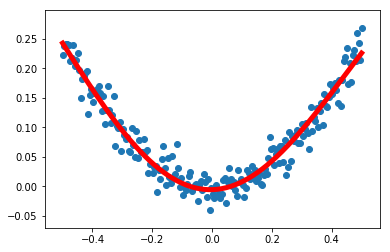

In [34]:
import matplotlib.pyplot as plt
# 使用Numpy生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise
# 定义两个placeholder
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)
#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#
loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    
    #获得预测值
    prediction_values = sess.run(prediction, feed_dict={x:x_data})
    
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_values,'r-',lw=5)
    plt.show()
        
        


### MNIST手写数字识别 简单版本


In [48]:
#每个批次的大小
batch_size = 100
#计算一定有多少个批次
n_batch = mnist.train.num_examples // batch_size
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

weights = tf.Variable(tf.zeros([784,10]))
bias = tf.Variable(tf.zeros([10]))

prediction = tf.nn.softmax(tf.matmul(x,weights)+bias)

loss = tf.reduce_mean(tf.square(y-prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # cast转换类型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter '+ str(epoch)+"testing acc: " + str(acc))
    



Iter 0testing acc: 0.8323
Iter 1testing acc: 0.8703
Iter 2testing acc: 0.8811
Iter 3testing acc: 0.8881
Iter 4testing acc: 0.8941
Iter 5testing acc: 0.8968
Iter 6testing acc: 0.9002
Iter 7testing acc: 0.9018
Iter 8testing acc: 0.9037
Iter 9testing acc: 0.9052
Iter 10testing acc: 0.9063
Iter 11testing acc: 0.9069
Iter 12testing acc: 0.9084
Iter 13testing acc: 0.9085
Iter 14testing acc: 0.91
Iter 15testing acc: 0.9109
Iter 16testing acc: 0.9118
Iter 17testing acc: 0.912
Iter 18testing acc: 0.9135
Iter 19testing acc: 0.9132
Iter 20testing acc: 0.9141


In [43]:
batch_xs,batch_ys = mnist.train.next_batch()

In [46]:
mnist.train.labels.shape

(55000,)

In [4]:
### 这里loss function改用交叉熵

#每个批次的大小
batch_size = 100
#计算一定有多少个批次
n_batch = mnist.train.num_examples // batch_size
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])

weights = tf.Variable(tf.zeros([784,10]))
bias = tf.Variable(tf.zeros([10]))

prediction = tf.nn.softmax(tf.matmul(x,weights)+bias)

# loss function改用 cross entropy
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # cast转换类型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(21):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys})
        acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels})
        print('Iter '+ str(epoch)+"testing acc: " + str(acc))
    



Iter 0testing acc: 0.8241
Iter 1testing acc: 0.8912
Iter 2testing acc: 0.9012
Iter 3testing acc: 0.906
Iter 4testing acc: 0.9084
Iter 5testing acc: 0.9098
Iter 6testing acc: 0.9118
Iter 7testing acc: 0.9138
Iter 8testing acc: 0.9139
Iter 9testing acc: 0.9161
Iter 10testing acc: 0.9158
Iter 11testing acc: 0.9181
Iter 12testing acc: 0.9182
Iter 13testing acc: 0.9186
Iter 14testing acc: 0.9192
Iter 15testing acc: 0.919
Iter 16testing acc: 0.9207
Iter 17testing acc: 0.9211
Iter 18testing acc: 0.9217
Iter 19testing acc: 0.921
Iter 20testing acc: 0.9215


In [8]:
### 这里应用dropout防止过拟合和增加一个中间层

#每个批次的大小
batch_size = 100
#计算一定有多少个批次
n_batch = mnist.train.num_examples // batch_size
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

weights1 = tf.Variable(tf.truncated_normal([784,1000],stddev=0.1))#我们之前初始化都采用0初始化，这里改用其他更好的方式
bias1 = tf.Variable(tf.zeros([1000])+0.1) #这里初始化增加了0.1
L1 = tf.nn.tanh(tf.matmul(x,weights1)+bias1)
L1_dropout = tf.nn.dropout(L1,keep_prob)


weights2 = tf.Variable(tf.truncated_normal([1000,1000],stddev=0.1))
bias2 = tf.Variable(tf.zeros([1000])+0.1) 
L2 = tf.nn.tanh(tf.matmul(L1_dropout,weights2)+bias2)
L2_dropout = tf.nn.dropout(L2,keep_prob)

weights3 = tf.Variable(tf.truncated_normal([1000,500],stddev=0.1))
bias3 = tf.Variable(tf.zeros([500])+0.1) 
L3 = tf.nn.tanh(tf.matmul(L2_dropout,weights3)+bias3)
L3_dropout = tf.nn.dropout(L3,keep_prob)

weights4 = tf.Variable(tf.truncated_normal([500,10],stddev=0.1))
bias4 = tf.Variable(tf.zeros([10])+0.1)

prediction = tf.nn.softmax(tf.matmul(L3_dropout,weights4)+bias4)
# loss function改用 cross entropy
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # cast转换类型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:1.0})
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print('Iter '+ str(epoch)+" training acc: " + str(train_acc))
        print('Iter '+ str(epoch)+" testing acc: " + str(test_acc))
    

Iter 0 training acc: 0.9516364
Iter 0 testing acc: 0.9472
Iter 1 training acc: 0.96607274
Iter 1 testing acc: 0.957
Iter 2 training acc: 0.9753636
Iter 2 testing acc: 0.9623
Iter 3 training acc: 0.9801818
Iter 3 testing acc: 0.9646
Iter 4 training acc: 0.9838
Iter 4 testing acc: 0.9666
Iter 5 training acc: 0.9858
Iter 5 testing acc: 0.9683
Iter 6 training acc: 0.9874182
Iter 6 testing acc: 0.9699
Iter 7 training acc: 0.98865455
Iter 7 testing acc: 0.97
Iter 8 training acc: 0.98954546
Iter 8 testing acc: 0.9709
Iter 9 training acc: 0.99038184
Iter 9 testing acc: 0.972
Iter 10 training acc: 0.9910727
Iter 10 testing acc: 0.9722
Iter 11 training acc: 0.9917455
Iter 11 testing acc: 0.9716
Iter 12 training acc: 0.9922364
Iter 12 testing acc: 0.9721
Iter 13 training acc: 0.9924909
Iter 13 testing acc: 0.9725
Iter 14 training acc: 0.9927091
Iter 14 testing acc: 0.9733
Iter 15 training acc: 0.9930182
Iter 15 testing acc: 0.9733
Iter 16 training acc: 0.9932
Iter 16 testing acc: 0.9733
Iter 17 t

In [7]:
### 上面出现了过拟合，下面用dropout来防止过拟合

#每个批次的大小
batch_size = 100
#计算一定有多少个批次
n_batch = mnist.train.num_examples // batch_size
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

weights1 = tf.Variable(tf.truncated_normal([784,1000],stddev=0.1))#我们之前初始化都采用0初始化，这里改用其他更好的方式
bias1 = tf.Variable(tf.zeros([1000])+0.1) #这里初始化增加了0.1
L1 = tf.nn.tanh(tf.matmul(x,weights1)+bias1)
L1_dropout = tf.nn.dropout(L1,keep_prob)


weights2 = tf.Variable(tf.truncated_normal([1000,1000],stddev=0.1))
bias2 = tf.Variable(tf.zeros([1000])+0.1) 
L2 = tf.nn.tanh(tf.matmul(L1_dropout,weights2)+bias2)
L2_dropout = tf.nn.dropout(L2,keep_prob)

weights3 = tf.Variable(tf.truncated_normal([1000,500],stddev=0.1))
bias3 = tf.Variable(tf.zeros([500])+0.1) 
L3 = tf.nn.tanh(tf.matmul(L2_dropout,weights3)+bias3)
L3_dropout = tf.nn.dropout(L3,keep_prob)

weights4 = tf.Variable(tf.truncated_normal([500,10],stddev=0.1))
bias4 = tf.Variable(tf.zeros([10])+0.1)

prediction = tf.nn.softmax(tf.matmul(L3_dropout,weights4)+bias4)
# loss function改用 cross entropy
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))

train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)
init = tf.global_variables_initializer()

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # cast转换类型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.8})
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print('Iter '+ str(epoch)+" training acc: " + str(train_acc))
        print('Iter '+ str(epoch)+" testing acc: " + str(test_acc))
    

Iter 0 training acc: 0.92225456
Iter 0 testing acc: 0.9256
Iter 1 training acc: 0.9389455
Iter 1 testing acc: 0.9395
Iter 2 training acc: 0.9481636
Iter 2 testing acc: 0.9454
Iter 3 training acc: 0.9527636
Iter 3 testing acc: 0.9494
Iter 4 training acc: 0.95785457
Iter 4 testing acc: 0.9521
Iter 5 training acc: 0.9611273
Iter 5 testing acc: 0.9562
Iter 6 training acc: 0.96416366
Iter 6 testing acc: 0.9588
Iter 7 training acc: 0.96645457
Iter 7 testing acc: 0.9594
Iter 8 training acc: 0.96892726
Iter 8 testing acc: 0.964
Iter 9 training acc: 0.9705273
Iter 9 testing acc: 0.9642
Iter 10 training acc: 0.9728182
Iter 10 testing acc: 0.9645
Iter 11 training acc: 0.97343636
Iter 11 testing acc: 0.9649
Iter 12 training acc: 0.97467273
Iter 12 testing acc: 0.9664
Iter 13 training acc: 0.97565454
Iter 13 testing acc: 0.9679
Iter 14 training acc: 0.97778183
Iter 14 testing acc: 0.9694
Iter 15 training acc: 0.9782364
Iter 15 testing acc: 0.969
Iter 16 training acc: 0.97965455
Iter 16 testing acc:

### 优化器测试

In [12]:
### 上面出现了过拟合，下面用dropout来防止过拟合

#每个批次的大小
batch_size = 100
#计算一定有多少个批次
n_batch = mnist.train.num_examples // batch_size
# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])
keep_prob = tf.placeholder(tf.float32)

weights1 = tf.Variable(tf.truncated_normal([784,1000],stddev=0.1))#我们之前初始化都采用0初始化，这里改用其他更好的方式
bias1 = tf.Variable(tf.zeros([1000])+0.1) #这里初始化增加了0.1
L1 = tf.nn.tanh(tf.matmul(x,weights1)+bias1)
L1_dropout = tf.nn.dropout(L1,keep_prob)


weights2 = tf.Variable(tf.truncated_normal([1000,1000],stddev=0.1))
bias2 = tf.Variable(tf.zeros([1000])+0.1) 
L2 = tf.nn.tanh(tf.matmul(L1_dropout,weights2)+bias2)
L2_dropout = tf.nn.dropout(L2,keep_prob)

weights3 = tf.Variable(tf.truncated_normal([1000,500],stddev=0.1))
bias3 = tf.Variable(tf.zeros([500])+0.1) 
L3 = tf.nn.tanh(tf.matmul(L2_dropout,weights3)+bias3)
L3_dropout = tf.nn.dropout(L3,keep_prob)

weights4 = tf.Variable(tf.truncated_normal([500,10],stddev=0.1))
bias4 = tf.Variable(tf.zeros([10])+0.1)

prediction = tf.nn.softmax(tf.matmul(L3_dropout,weights4)+bias4)
# loss function改用 cross entropy
#loss = tf.reduce_mean(tf.square(y-prediction))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y,logits = prediction))
# 这里换AdamOptimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)
init = tf.global_variables_initializer()

#准确率
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # cast转换类型

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(31):
        for batch in range(n_batch):
            batch_xs,batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step,feed_dict={x:batch_xs,y:batch_ys,keep_prob:0.8})
        test_acc = sess.run(accuracy,feed_dict={x:mnist.test.images,y:mnist.test.labels,keep_prob:1.0})
        train_acc = sess.run(accuracy,feed_dict={x:mnist.train.images,y:mnist.train.labels,keep_prob:1.0})
        print('Iter '+ str(epoch)+" training acc: " + str(train_acc))
        print('Iter '+ str(epoch)+" testing acc: " + str(test_acc))
    

Iter 0 training acc: 0.91972727
Iter 0 testing acc: 0.9228
Iter 1 training acc: 0.9392727
Iter 1 testing acc: 0.9378
Iter 2 training acc: 0.94885457
Iter 2 testing acc: 0.9471
Iter 3 training acc: 0.9556909
Iter 3 testing acc: 0.9517
Iter 4 training acc: 0.96134543
Iter 4 testing acc: 0.9554
Iter 5 training acc: 0.96385455
Iter 5 testing acc: 0.96
Iter 6 training acc: 0.96770906
Iter 6 testing acc: 0.9626
Iter 7 training acc: 0.97056365
Iter 7 testing acc: 0.9625
Iter 8 training acc: 0.974
Iter 8 testing acc: 0.9667
Iter 9 training acc: 0.9758
Iter 9 testing acc: 0.967
Iter 10 training acc: 0.9778909
Iter 10 testing acc: 0.9683
Iter 11 training acc: 0.9789091
Iter 11 testing acc: 0.9703
Iter 12 training acc: 0.9805091
Iter 12 testing acc: 0.972
Iter 13 training acc: 0.98194546
Iter 13 testing acc: 0.9714
Iter 14 training acc: 0.9824182
Iter 14 testing acc: 0.9718
Iter 15 training acc: 0.98407274
Iter 15 testing acc: 0.973
Iter 16 training acc: 0.9847091
Iter 16 testing acc: 0.974
Iter 